In [4]:
from datasets import load_dataset

dataset = load_dataset("webis/tldr-17")
dataset = dataset["train"]
dataset

Generating train split:   0%|          | 0/3848330 [00:00<?, ? examples/s]

Dataset({
    features: ['author', 'body', 'normalizedBody', 'subreddit', 'subreddit_id', 'id', 'content', 'summary'],
    num_rows: 3848330
})

In [5]:
def update_dict(d, k, value):
    if k not in d:
        d[k] = {"value": value, "n": 1}
    else:
        d[k]["value"] = d[k]["value"] + value
        d[k]["n"] = 1 + d[k]["n"]

counter = {}
for comment in dataset:
    label = comment['subreddit'].lower()
    if label not in counter:
        counter[label] = 1
    else:
        counter[label] = counter[label] + 1
sorted_counter = sorted(counter.items(), key=lambda x:x[1], reverse = True)


print(sorted_counter[:10])

[('askreddit', 589947), ('relationships', 352049), ('leagueoflegends', 109307), ('tifu', 52219), ('relationship_advice', 50416), ('trees', 47286), ('gaming', 43851), ('atheism', 43268), ('adviceanimals', 40783), ('funny', 40171)]


In [6]:
min_posts = 1500

short_counter = {}
for key in counter:
    if counter[key] > min_posts:
        short_counter[key] = counter[key]

print("There are ", len(counter), "subreddits with a total of ", sum(counter.values()), "posts")
print("If we filter and keep only subreddits with more than 1500 posts, there are ",
      len(short_counter), "subreddits with a total of ", sum(short_counter.values()), "posts")

There are  29651 subreddits with a total of  3848330 posts
If we filter and keep only subreddits with more than 1500 posts, there are  296 subreddits with a total of  2904726 posts


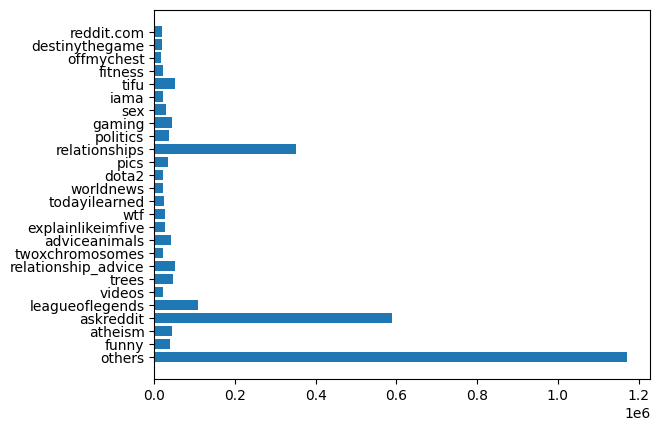

{'others': 1170173,
 'funny': 40171,
 'atheism': 43268,
 'askreddit': 589947,
 'leagueoflegends': 109307,
 'videos': 20567,
 'trees': 47286,
 'relationship_advice': 50416,
 'twoxchromosomes': 21562,
 'adviceanimals': 40783,
 'explainlikeimfive': 25482,
 'wtf': 25781,
 'todayilearned': 25004,
 'worldnews': 22577,
 'dota2': 22405,
 'pics': 35098,
 'relationships': 352049,
 'politics': 36518,
 'gaming': 43851,
 'sex': 28806,
 'iama': 22689,
 'tifu': 52219,
 'fitness': 22694,
 'offmychest': 17175,
 'destinythegame': 19878,
 'reddit.com': 19020}

In [ ]:
import matplotlib.pyplot as plt

# In order to group, as there are too many subreddits, we have to group some in a category "others"

# Work with a copy
grouped_subreddits = short_counter.copy()

# Thresholf for "others" category
threshold = 15000

# Create a new dictionary to store the grouped subreddits
grouped_subreddits = {'others': 0}

# Iterate through the original dictionary
for subreddit, posts in short_counter.items():
    if posts < threshold:
        # Add posts to the 'others' key
        grouped_subreddits['others'] += posts
    else:
        # Add subreddits with 5000 or more posts directly
        grouped_subreddits[subreddit] = posts

plt.barh(range(len(grouped_subreddits)), list(grouped_subreddits.values()), align='center')
plt.yticks(range(len(grouped_subreddits)), list(grouped_subreddits.keys()))
plt.show()

grouped_subreddits

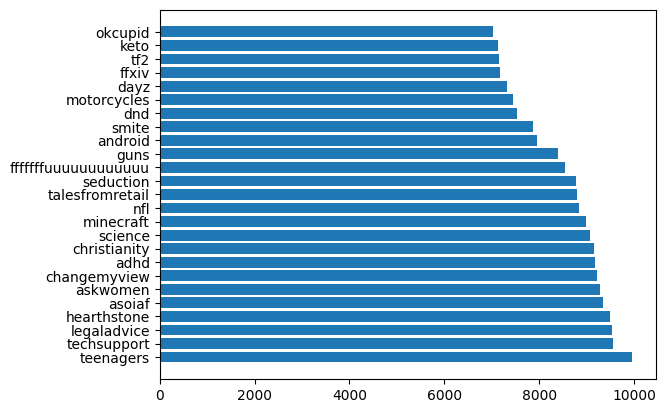

{'teenagers': 9957,
 'techsupport': 9544,
 'legaladvice': 9523,
 'hearthstone': 9500,
 'asoiaf': 9351,
 'askwomen': 9278,
 'changemyview': 9212,
 'adhd': 9169,
 'christianity': 9146,
 'science': 9062,
 'minecraft': 8983,
 'nfl': 8841,
 'talesfromretail': 8785,
 'seduction': 8784,
 'fffffffuuuuuuuuuuuu': 8542,
 'guns': 8403,
 'android': 7942,
 'smite': 7869,
 'dnd': 7535,
 'motorcycles': 7457,
 'dayz': 7324,
 'ffxiv': 7173,
 'tf2': 7152,
 'keto': 7139,
 'okcupid': 7035}

In [ ]:
# We can also plot subreddits with posts between two quantities

min_posts = 7000
max_posts = 10000

# Filter subreddits based on the number of posts
filtered_subreddits = {subreddit: posts for subreddit, posts in short_counter.items() if min_posts <= posts <= max_posts}

# Sort subreddits based on the number of posts in descending order
sorted_subreddits = dict(sorted(filtered_subreddits.items(), key=lambda x: x[1], reverse=True))


plt.barh(range(len(sorted_subreddits)), list(sorted_subreddits.values()), align='center')
plt.yticks(range(len(sorted_subreddits)), list(sorted_subreddits.keys()))
plt.show()

sorted_subreddits

In [ ]:
# Search for the target words in tokenized sentences
def search_for_words(target_words):
    matching = {}
    for post in dataset:
        if any(word in post["normalizedBody"].lower() for word in target_words):
            label = post["subreddit"].lower()
            if label in matching:
                matching[label]["n"] = 1 + matching[label]["n"]
            else:
                matching[label] = {"n": 1, "n_total": counter[label]}
    return matching

# Search for loss word
target_words = ["loss", "losses", "lose", "lost"]

loss_word = search_for_words(target_words)


{'gamingpc': {'n': 68, 'n_total': 553},
 'abandonedporn': {'n': 17, 'n_total': 110},
 'animals': {'n': 13, 'n_total': 58},
 'leagueoflegends': {'n': 28059, 'n_total': 109307},
 'videos': {'n': 2725, 'n_total': 20567},
 'askreddit': {'n': 114022, 'n_total': 589947},
 'atheism': {'n': 6333, 'n_total': 43268},
 'twoxchromosomes': {'n': 5638, 'n_total': 21562},
 'personalfinance': {'n': 3292, 'n_total': 14403},
 'askseddit': {'n': 1077, 'n_total': 3096},
 'guildwars2': {'n': 1818, 'n_total': 10948},
 'science': {'n': 1180, 'n_total': 9062},
 'zelda': {'n': 191, 'n_total': 1182},
 'pics': {'n': 4460, 'n_total': 35098},
 'sex': {'n': 6888, 'n_total': 28806},
 'politics': {'n': 5537, 'n_total': 36518},
 'girlgamers': {'n': 104, 'n_total': 818},
 'chicago': {'n': 260, 'n_total': 1653},
 'pokemon': {'n': 896, 'n_total': 6464},
 'ladymras': {'n': 4, 'n_total': 15},
 'nfl': {'n': 1851, 'n_total': 8841},
 'skyrim': {'n': 960, 'n_total': 6317},
 'shutupandtakemymoney': {'n': 22, 'n_total': 191},
 '

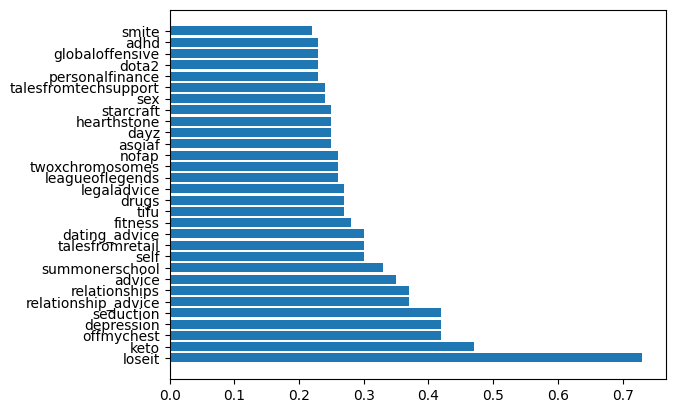

{'loseit': {'n': 7726, 'n_total': 10559, 'prop': 0.73},
 'keto': {'n': 3355, 'n_total': 7139, 'prop': 0.47},
 'offmychest': {'n': 7224, 'n_total': 17175, 'prop': 0.42},
 'depression': {'n': 4768, 'n_total': 11365, 'prop': 0.42},
 'seduction': {'n': 3663, 'n_total': 8784, 'prop': 0.42},
 'relationship_advice': {'n': 18557, 'n_total': 50416, 'prop': 0.37},
 'relationships': {'n': 131911, 'n_total': 352049, 'prop': 0.37},
 'advice': {'n': 3500, 'n_total': 10115, 'prop': 0.35},
 'summonerschool': {'n': 4526, 'n_total': 13806, 'prop': 0.33},
 'self': {'n': 3044, 'n_total': 10166, 'prop': 0.3},
 'talesfromretail': {'n': 2602, 'n_total': 8785, 'prop': 0.3},
 'dating_advice': {'n': 3750, 'n_total': 12361, 'prop': 0.3},
 'fitness': {'n': 6453, 'n_total': 22694, 'prop': 0.28},
 'tifu': {'n': 14161, 'n_total': 52219, 'prop': 0.27},
 'drugs': {'n': 2749, 'n_total': 10035, 'prop': 0.27},
 'legaladvice': {'n': 2536, 'n_total': 9523, 'prop': 0.27},
 'leagueoflegends': {'n': 28059, 'n_total': 109307, 

In [ ]:
# There are too many subreddits, so lets process that

loss_word2 = loss_word.copy()
for key in loss_word:
    if loss_word2[key]["n_total"] > min_posts:
        loss_word2[key]["prop"] = round( loss_word2[key]["n"] / loss_word2[key]["n_total"], 2)
    else:
        del loss_word2[key]


processed_loss_word = dict(sorted(loss_word2.items(), key=lambda x: x[1]['prop'], reverse=True)[:30])

values=[elem["prop"] for elem in processed_loss_word.values()]

plt.barh(range(len(processed_loss_word)), values, align='center')
plt.yticks(range(len(processed_loss_word)), list(processed_loss_word.keys()))
plt.show()

processed_loss_word

In [7]:
most_posts_dataset = dataset.filter(lambda example: example["subreddit"].lower() in list(short_counter.keys()))
most_posts_dataset

Filter:   0%|          | 0/3848330 [00:00<?, ? examples/s]

Dataset({
    features: ['author', 'body', 'normalizedBody', 'subreddit', 'subreddit_id', 'id', 'content', 'summary'],
    num_rows: 2904726
})

In [8]:
small_dataset = most_posts_dataset.shuffle(seed=23).select(range(500000))

In [9]:
dataset = small_dataset.train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'normalizedBody', 'subreddit', 'subreddit_id', 'id', 'content', 'summary'],
        num_rows: 400000
    })
    test: Dataset({
        features: ['author', 'body', 'normalizedBody', 'subreddit', 'subreddit_id', 'id', 'content', 'summary'],
        num_rows: 100000
    })
})

In [10]:
import torch
from transformers import DistilBertTokenizerFast

# Load pre-trained BERT model and tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [11]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

def tokenize_function(examples):
    return tokenizer(examples["normalizedBody"],
                     padding="longest",
                     truncation=True,
                     return_special_tokens_mask=True)

# Tokenize the dataset
dataset_tokenized = dataset.map(tokenize_function, batched=True, remove_columns=dataset["train"].column_names)
dataset_tokenized

Map:   0%|          | 0/400000 [00:00<?, ? examples/s]

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 400000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 100000
    })
})

In [12]:
# Loading the model and moving it to the GPU if available
if torch.cuda.is_available():  # for nvidia GPUs etc.
    device = torch.device('cuda')
elif torch.backends.mps.is_available(): # for Apple Metal Performance Sharder (mps) GPUs
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(device)

cuda


In [13]:
from transformers import AutoModelForMaskedLM, TrainingArguments, Trainer, DistilBertConfig, DataCollatorForLanguageModeling


# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=0.2,
                          attention_dropout=0.2,
                          output_hidden_states=True)

model = AutoModelForMaskedLM.from_pretrained('distilbert-base-uncased', config=config)


data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [14]:
from transformers import TrainingArguments, Trainer

batch_size = 8
# Show the training loss with every epoch
logging_steps = len(dataset_tokenized["train"]) // batch_size

# Define the training arguments
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    num_train_epochs=4,
    learning_rate=5e-5,
    weight_decay=0.01,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    logging_steps=logging_steps,
    save_total_limit = 5,
)

In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_tokenized["train"],
    eval_dataset=dataset_tokenized["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [16]:
import math

eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


>>> Perplexity: 18.74


In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.334400,2.024753
2,2.142500,1.929632
3,2.044100,1.859298
4,1.977900,1.820479


TrainOutput(global_step=200000, training_loss=2.1247419140625, metrics={'train_runtime': 21517.8615, 'train_samples_per_second': 74.357, 'train_steps_per_second': 9.295, 'total_flos': 2.120978497536e+17, 'train_loss': 2.1247419140625, 'epoch': 4.0})

In [21]:
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 6.17


In [22]:
from transformers import modelcard
history = modelcard.parse_log_history(trainer.state.log_history)

train_losses = []
test_losses = []
for key in history[1]:
  train_losses.append(key['Training Loss'])
  test_losses.append(key['Validation Loss'])

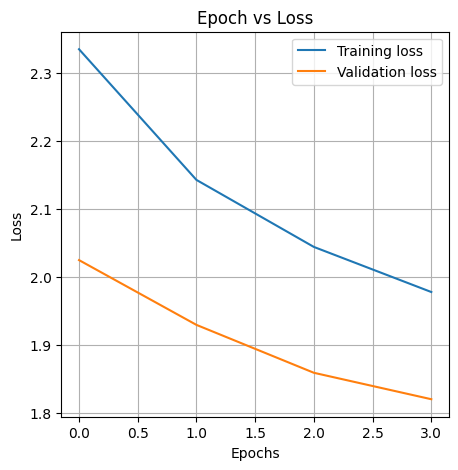

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(train_losses)),train_losses, label = "Training loss")
ax1.plot(range(len(test_losses)),test_losses,  label = "Validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Epoch vs Loss")
plt.legend()
plt.grid()
plt.show()

In [19]:
trainer.save_model("/content/model")